In [1]:
import pandas as pd
import numpy as np

In [2]:
file = "C:/Users/User/Desktop/SEM 7/FYP I/Dataset/DF.xlsx"
df = pd.read_excel(file, sheet_name="Sheet1")
df.head()

,date,ffb_20%_oer,ffb_1%_oer,import,export,production,end_stock,cpo_futures,usd_myr_rate,brent_oil_futures,soybean_futures,precipitation,avg_temperature,avg_humidity
0,2019-01-01,NaN,NaN,81477,1680891,1737461,3002871,NaN,4.1325,NaN,NaN,32.4,25.666667,95.000000
1,2019-01-02,400.0,20.0,81477,1680891,1737461,3002871,2070.0,4.1370,54.91,28.18,6.0,27.166667,88.458333
2,2019-01-03,402.0,20.1,81477,1680891,1737461,3002871,2090.0,4.1435,55.95,28.43,7.1,27.250000,90.625000
3,2019-01-04,408.0,20.4,81477,1680891,1737461,3002871,2120.0,4.1355,57.06,28.64,0.0,27.083333,87.333333
4,2019-01-05,NaN,NaN,81477,1680891,1737461,3002871,NaN,NaN,NaN,NaN,3.3,28.625000,86.375000


In [3]:
df.set_index("date", inplace=True)

In [4]:
df = df.drop('ffb_20%_oer', axis=1)

In [5]:
df.isnull().sum()

ffb_1%_oer           753
import                 0
export                 0
production             0
end_stock              0
cpo_futures          789
usd_myr_rate         712
brent_oil_futures    687
soybean_futures      688
precipitation          0
avg_temperature       62
avg_humidity          62
dtype: int64

In [6]:
print(f"Original data shape: {df.shape}")

Original data shape: (2343, 12)


In [7]:
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt

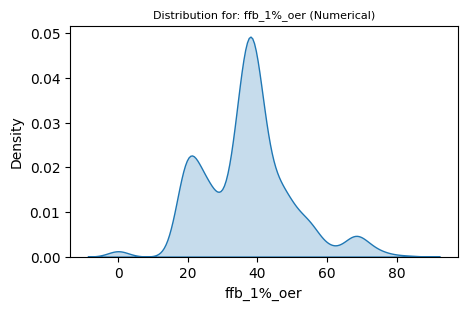

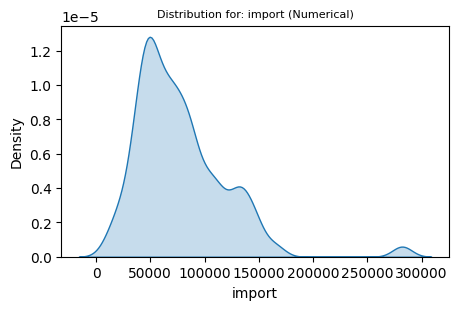

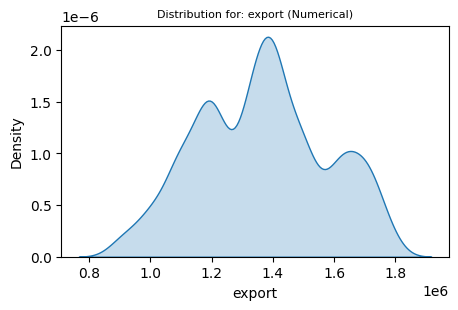

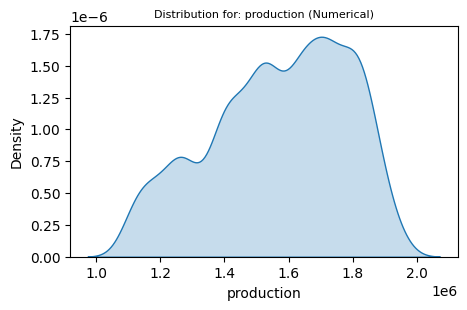

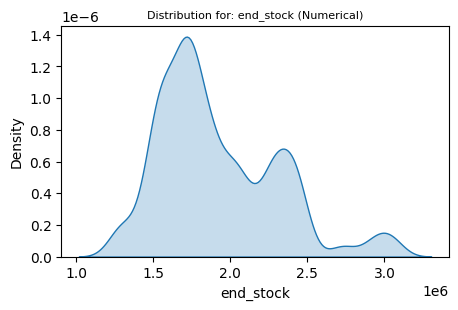

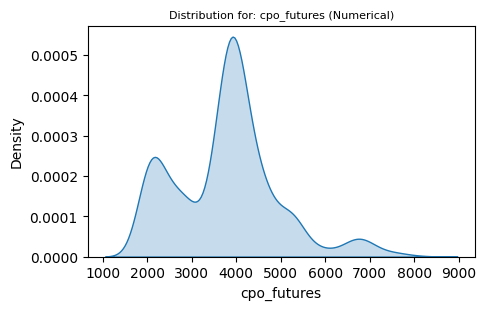

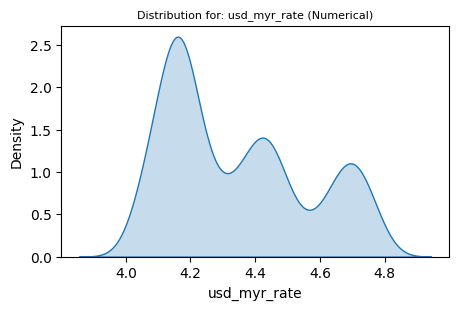

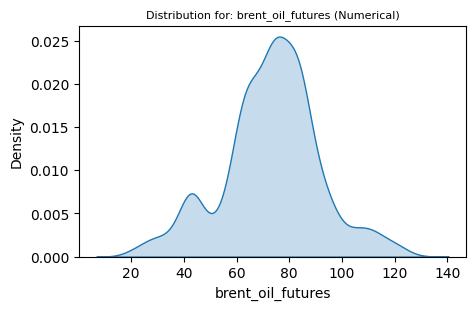

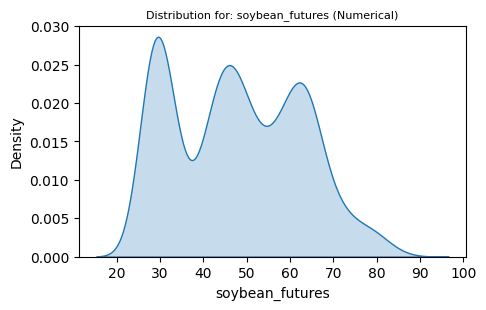

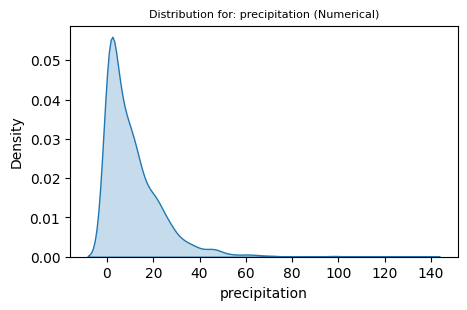

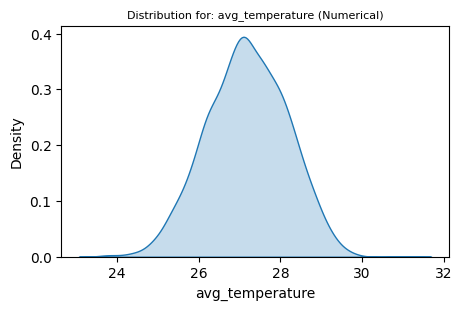

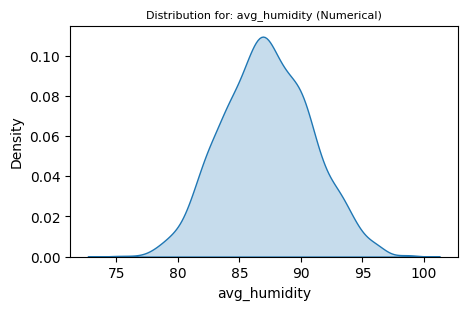

In [8]:
columns_to_plot = df.columns

# --- 3. Loop and Visualize ---
for col in columns_to_plot:
    
    if is_numeric_dtype(df[col]):
        # --- A: Plot for NUMERICAL Columns (KDE Plot) ---
        plt.figure(figsize=(5, 3))
        plt.title(f'Distribution for: {col} (Numerical)', fontsize=8)
        
        # Plot the distribution
        sns.kdeplot(df[col], fill=True, linewidth=1)
        
        plt.xlabel(col)
        plt.ylabel('Density')
        
    else:
        # --- B: Plot for CATEGORICAL Columns (Count Plot) ---
        plt.figure(figsize=(5, 3))
        plt.title(f'Distribution for: {col} (Categorical)', fontsize=8)

        # Plot the counts
        # We add 'order' to sort the bars by frequency (most common first)
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        
        plt.xlabel(col)
        plt.ylabel('Count')

    # Show the plot for the current column
    plt.show()

Using time column: date
Numerical columns to plot: ['ffb_1%_oer', 'import', 'export', 'production', 'end_stock', 'cpo_futures', 'usd_myr_rate', 'brent_oil_futures', 'soybean_futures', 'precipitation', 'avg_temperature', 'avg_humidity']
Categorical columns to plot: []

Saved 'numerical_timeseries_grid.png'


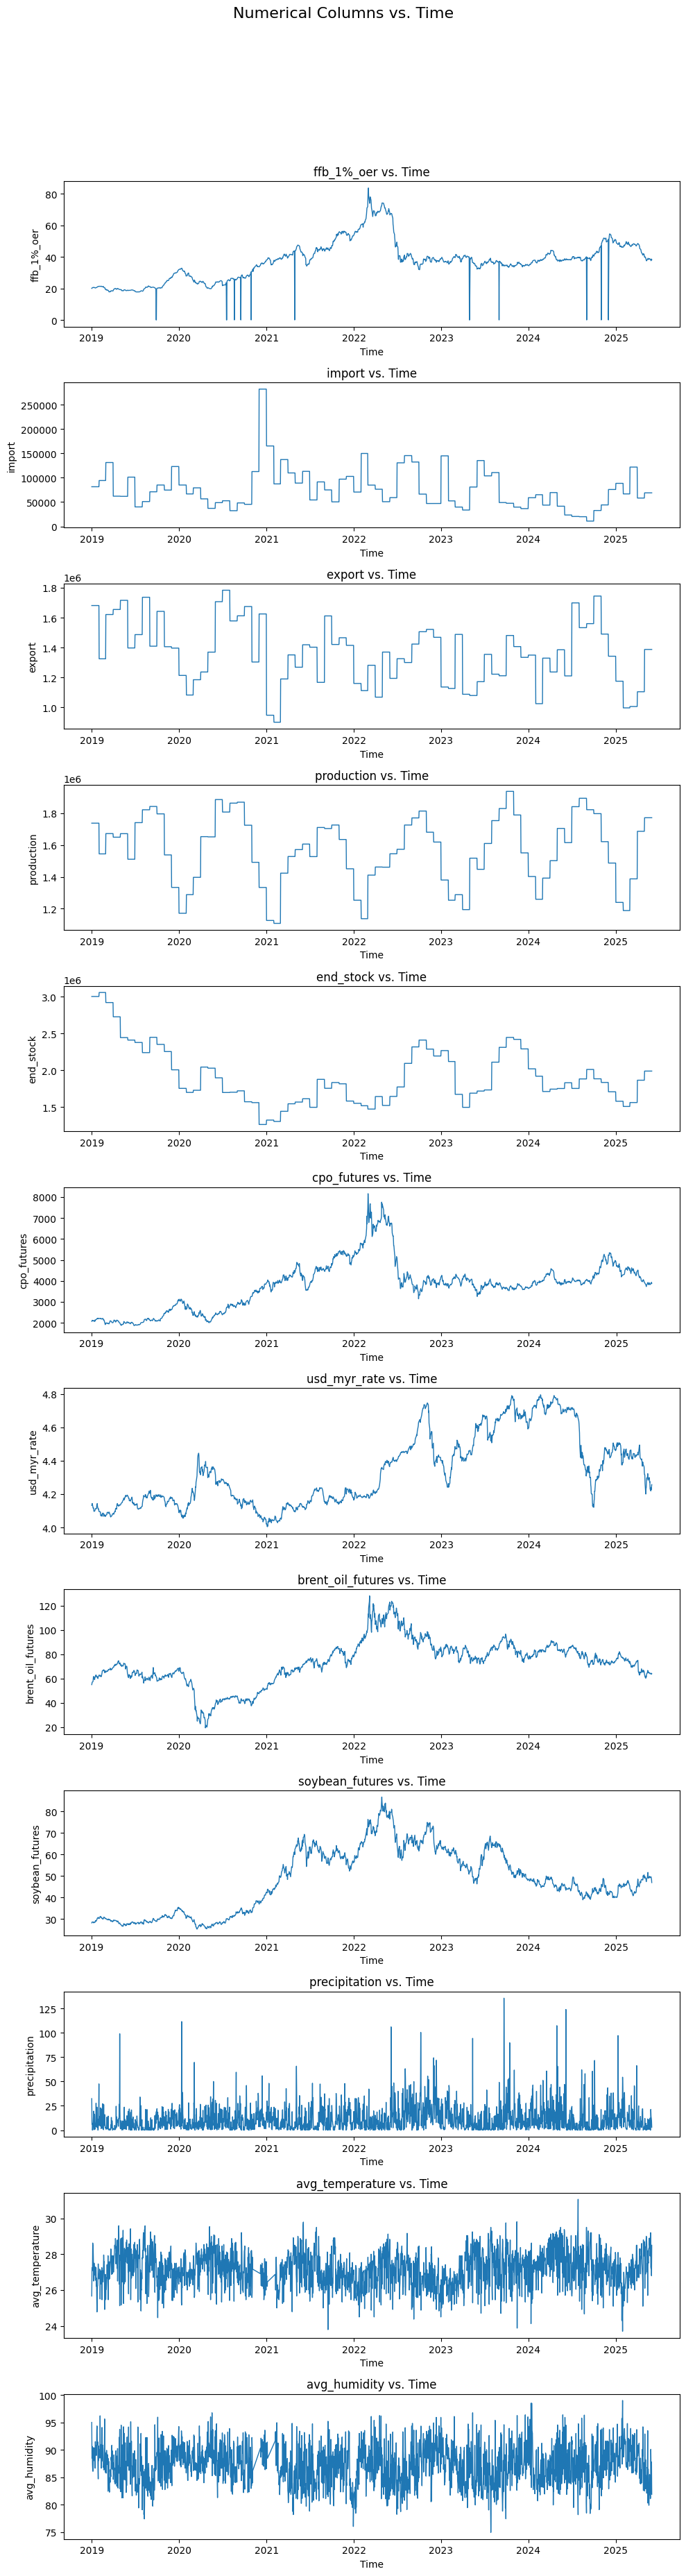

In [9]:
time_column="date"

columns_to_plot = [col for col in df.columns if col not in [time_column, 'target']] 
numerical_cols = [col for col in columns_to_plot if is_numeric_dtype(df[col])]
categorical_cols = [col for col in columns_to_plot if not is_numeric_dtype(df[col])]

print(f"Using time column: {time_column}")
print(f"Numerical columns to plot: {numerical_cols}")
print(f"Categorical columns to plot: {categorical_cols}")

# --- 3. Plot Numerical Columns in a Grid (vs. Time) ---
if numerical_cols:
    # We'll make a tall grid, one plot per row
    n_rows = len(numerical_cols)
    n_cols = 1 
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 3)) # 10" wide, 3" tall per plot
    fig.suptitle('Numerical Columns vs. Time', fontsize=16, y=1.03)
    
    if n_rows == 1: # Handle case where there's only one numerical plot
        axes = [axes]
    else:
        axes = axes.flatten() # Make it easy to loop
    
    for i, col in enumerate(numerical_cols):
        # Use lineplot for numerical data
        sns.lineplot(x=time_column, y=col, data=df, ax=axes[i], lw=1) 
        axes[i].set_title(f'{col} vs. Time')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel(col)
    
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust for suptitle
    plt.savefig('numerical_timeseries_grid.png')
    print("\nSaved 'numerical_timeseries_grid.png'")

# --- 4. Plot Categorical Columns in a Grid (vs. Time) ---
if categorical_cols:
    n_rows = len(categorical_cols)
    n_cols = 1
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 3))
    fig.suptitle('Categorical Columns vs. Time', fontsize=16, y=1.03)
    
    if n_rows == 1: # Handle case where there's only one categorical plot
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        # Use scatterplot for categorical data vs. time
        sns.scatterplot(x=_column, y=col, data=df, ax=axes[i], s=10, alpha=0.5, legend=False)
        axes[i].set_title(f'{col} vs. Time')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel(col)
            
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust for suptitle
    plt.savefig('categorical_timeseries_grid.png')
    print("Saved 'categorical_timeseries_grid.png'")

APPLYING FORWARD FILL TO FILL NON-TRADING DAY DATA:

In [10]:
cols_to_ffill = [
    "ffb_1%_oer",
    "cpo_futures",
    "usd_myr_rate",
    "brent_oil_futures",
    "soybean_futures"
]

df[cols_to_ffill] = df[cols_to_ffill].replace(0, np.nan)
df[cols_to_ffill] = df[cols_to_ffill].fillna(method="ffill")

C:\Users\User\AppData\Local\Temp\ipykernel_24344\1046028249.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[cols_to_ffill] = df[cols_to_ffill].fillna(method="ffill")


In [11]:
df.isnull().sum()

ffb_1%_oer            1
import                0
export                0
production            0
end_stock             0
cpo_futures           1
usd_myr_rate          0
brent_oil_futures     1
soybean_futures       1
precipitation         0
avg_temperature      62
avg_humidity         62
dtype: int64

Using time interpolation to fill missing temp and humidity value + using monthly mean to fill long gaps:

In [12]:
#time interpolation
df["avg_temperature"] = df["avg_temperature"].interpolate(method="time", limit=7, limit_direction="both")
df["avg_humidity"] = df["avg_humidity"].interpolate(method="time", limit=7, limit_direction="both")

In [13]:
#monthly average for gap longer than 7 days
df["avg_temperature"] = df["avg_temperature"].fillna(df.groupby(df.index.month)["avg_temperature"].transform("mean"))
df["avg_humidity"] = df["avg_humidity"].fillna(df.groupby(df.index.month)["avg_humidity"].transform("mean"))

In [14]:
df.isnull().sum()

ffb_1%_oer           1
import               0
export               0
production           0
end_stock            0
cpo_futures          1
usd_myr_rate         0
brent_oil_futures    1
soybean_futures      1
precipitation        0
avg_temperature      0
avg_humidity         0
dtype: int64

In [15]:
#Drop the first row to remove empty data
df = df.drop(df.index[0])

In [16]:
df.head()

,ffb_1%_oer,import,export,production,end_stock,cpo_futures,usd_myr_rate,brent_oil_futures,soybean_futures,precipitation,avg_temperature,avg_humidity
date,,,,,,,,,,,,
2019-01-02,20.0,81477,1680891,1737461,3002871,2070.0,4.1370,54.91,28.18,6.0,27.166667,88.458333
2019-01-03,20.1,81477,1680891,1737461,3002871,2090.0,4.1435,55.95,28.43,7.1,27.250000,90.625000
2019-01-04,20.4,81477,1680891,1737461,3002871,2120.0,4.1355,57.06,28.64,0.0,27.083333,87.333333
2019-01-05,20.4,81477,1680891,1737461,3002871,2120.0,4.1355,57.06,28.64,3.3,28.625000,86.375000
2019-01-06,20.4,81477,1680891,1737461,3002871,2120.0,4.1355,57.06,28.64,5.1,28.500000,86.083333


In [17]:
df.isnull().sum()

ffb_1%_oer           0
import               0
export               0
production           0
end_stock            0
cpo_futures          0
usd_myr_rate         0
brent_oil_futures    0
soybean_futures      0
precipitation        0
avg_temperature      0
avg_humidity         0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

Using time column: date
Numerical columns to plot: ['ffb_1%_oer', 'import', 'export', 'production', 'end_stock', 'cpo_futures', 'usd_myr_rate', 'brent_oil_futures', 'soybean_futures', 'precipitation', 'avg_temperature', 'avg_humidity']
Categorical columns to plot: []

Saved 'numerical_timeseries_grid.png'


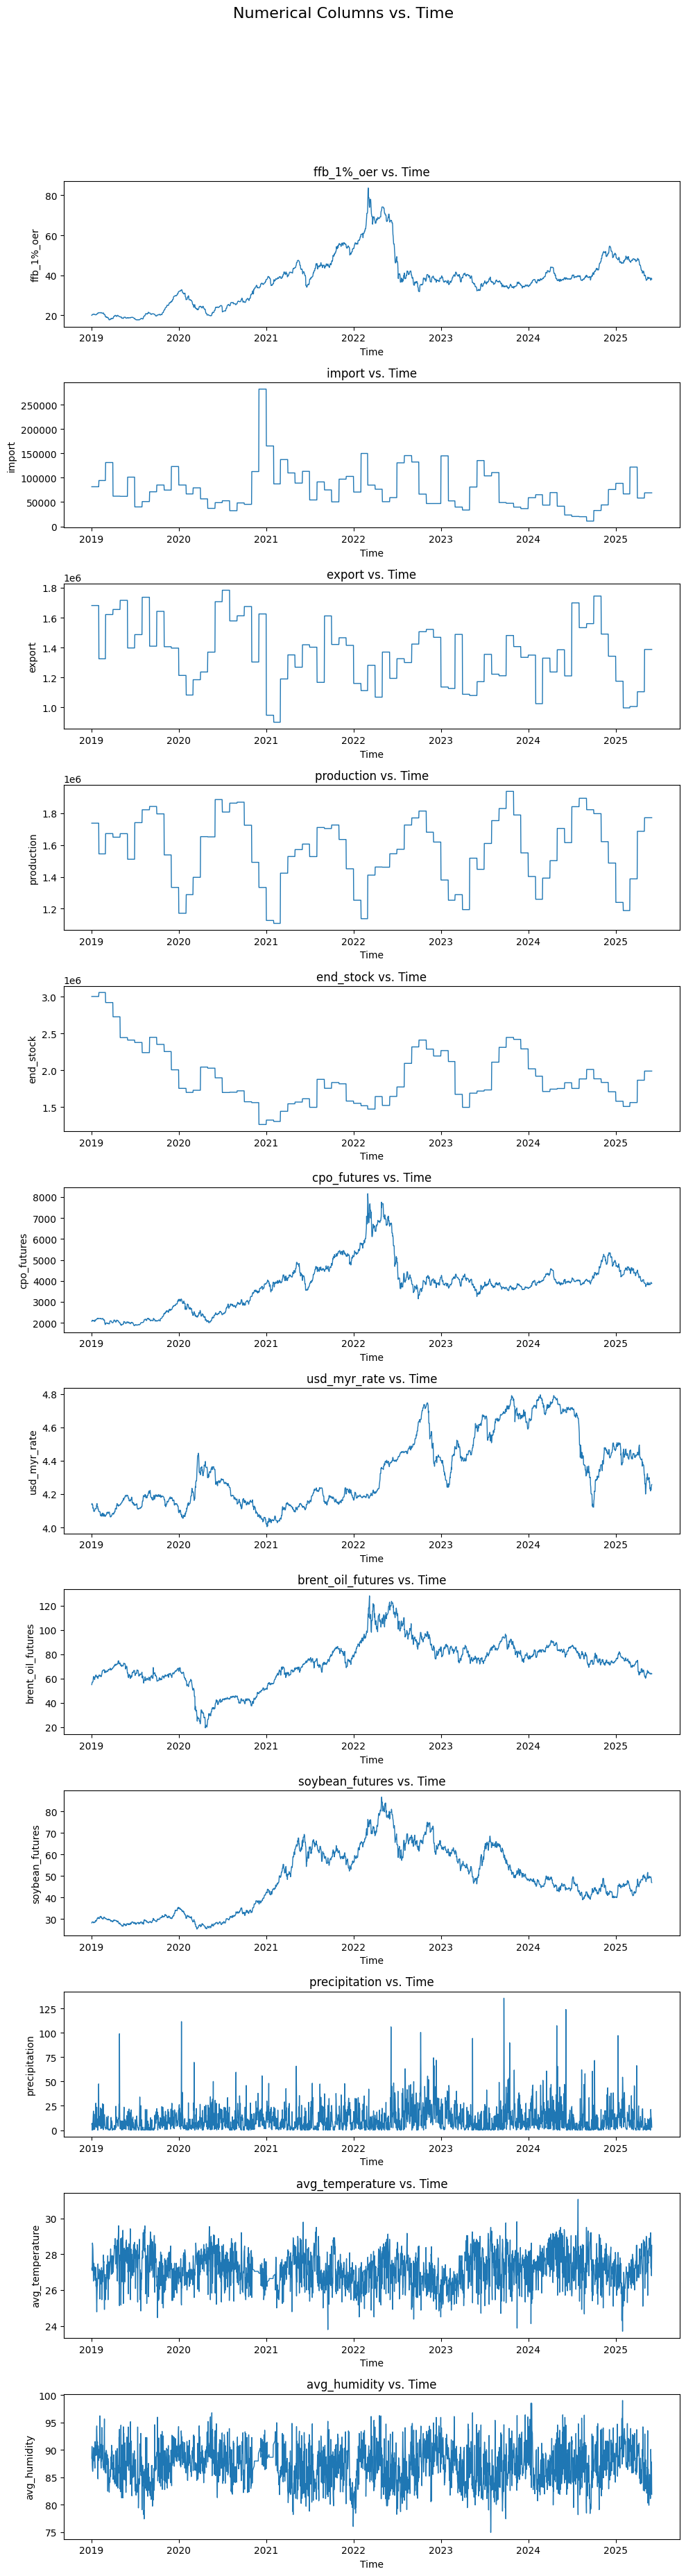

In [19]:
time_column="date"

columns_to_plot = [col for col in df.columns if col not in [time_column, 'target']] 
numerical_cols = [col for col in columns_to_plot if is_numeric_dtype(df[col])]
categorical_cols = [col for col in columns_to_plot if not is_numeric_dtype(df[col])]

print(f"Using time column: {time_column}")
print(f"Numerical columns to plot: {numerical_cols}")
print(f"Categorical columns to plot: {categorical_cols}")

# --- 3. Plot Numerical Columns in a Grid (vs. Time) ---
if numerical_cols:
    # We'll make a tall grid, one plot per row
    n_rows = len(numerical_cols)
    n_cols = 1 
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 3)) # 10" wide, 3" tall per plot
    fig.suptitle('Numerical Columns vs. Time', fontsize=16, y=1.03)
    
    if n_rows == 1: # Handle case where there's only one numerical plot
        axes = [axes]
    else:
        axes = axes.flatten() # Make it easy to loop
    
    for i, col in enumerate(numerical_cols):
        # Use lineplot for numerical data
        sns.lineplot(x=time_column, y=col, data=df, ax=axes[i], lw=1) 
        axes[i].set_title(f'{col} vs. Time')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel(col)
    
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust for suptitle
    plt.savefig('numerical_timeseries_grid.png')
    print("\nSaved 'numerical_timeseries_grid.png'")

# --- 4. Plot Categorical Columns in a Grid (vs. Time) ---
if categorical_cols:
    n_rows = len(categorical_cols)
    n_cols = 1
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 3))
    fig.suptitle('Categorical Columns vs. Time', fontsize=16, y=1.03)
    
    if n_rows == 1: # Handle case where there's only one categorical plot
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        # Use scatterplot for categorical data vs. time
        sns.scatterplot(x=_column, y=col, data=df, ax=axes[i], s=10, alpha=0.5, legend=False)
        axes[i].set_title(f'{col} vs. Time')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel(col)
            
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust for suptitle
    plt.savefig('categorical_timeseries_grid.png')
    print("Saved 'categorical_timeseries_grid.png'")

In [20]:
df.shape

(2342, 12)

In [21]:
(df['ffb_1%_oer'] == 0).sum()

np.int64(0)

FEATURE ENGINEERING:

In [22]:
#lag features
for lag in [1, 3, 7]:
    df[f"lag_{lag}"] = df["ffb_1%_oer"].shift(lag)


#rolling means
df["rolling_mean_7"] = df["ffb_1%_oer"].rolling(window=7).mean()
df["rolling_mean_30"] = df["ffb_1%_oer"].rolling(window=30).mean()

#rolling std
df["rolling_std_7"] = df["ffb_1%_oer"].rolling(window=7).std()
df["rolling_std_30"] = df["ffb_1%_oer"].rolling(window=30).std()

#pct change
df["pct_change_1"] = df["ffb_1%_oer"].pct_change(periods=1)
df["pct_change_7"] = df["ffb_1%_oer"].pct_change(periods=7)

In [23]:
df.head()

,ffb_1%_oer,import,export,production,end_stock,cpo_futures,usd_myr_rate,brent_oil_futures,soybean_futures,precipitation,...,avg_humidity,lag_1,lag_3,lag_7,rolling_mean_7,rolling_mean_30,rolling_std_7,rolling_std_30,pct_change_1,pct_change_7
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,20.0,81477,1680891,1737461,3002871,2070.0,4.1370,54.91,28.18,6.0,...,88.458333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,20.1,81477,1680891,1737461,3002871,2090.0,4.1435,55.95,28.43,7.1,...,90.625000,20.0,NaN,NaN,NaN,NaN,NaN,NaN,0.005000,NaN
2019-01-04,20.4,81477,1680891,1737461,3002871,2120.0,4.1355,57.06,28.64,0.0,...,87.333333,20.1,NaN,NaN,NaN,NaN,NaN,NaN,0.014925,NaN
2019-01-05,20.4,81477,1680891,1737461,3002871,2120.0,4.1355,57.06,28.64,3.3,...,86.375000,20.4,20.0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2019-01-06,20.4,81477,1680891,1737461,3002871,2120.0,4.1355,57.06,28.64,5.1,...,86.083333,20.4,20.1,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


In [24]:
df.isnull().sum()

ffb_1%_oer            0
import                0
export                0
production            0
end_stock             0
cpo_futures           0
usd_myr_rate          0
brent_oil_futures     0
soybean_futures       0
precipitation         0
avg_temperature       0
avg_humidity          0
lag_1                 1
lag_3                 3
lag_7                 7
rolling_mean_7        6
rolling_mean_30      29
rolling_std_7         6
rolling_std_30       29
pct_change_1          1
pct_change_7          7
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df.isnull().sum()

ffb_1%_oer           0
import               0
export               0
production           0
end_stock            0
cpo_futures          0
usd_myr_rate         0
brent_oil_futures    0
soybean_futures      0
precipitation        0
avg_temperature      0
avg_humidity         0
lag_1                0
lag_3                0
lag_7                0
rolling_mean_7       0
rolling_mean_30      0
rolling_std_7        0
rolling_std_30       0
pct_change_1         0
pct_change_7         0
dtype: int64

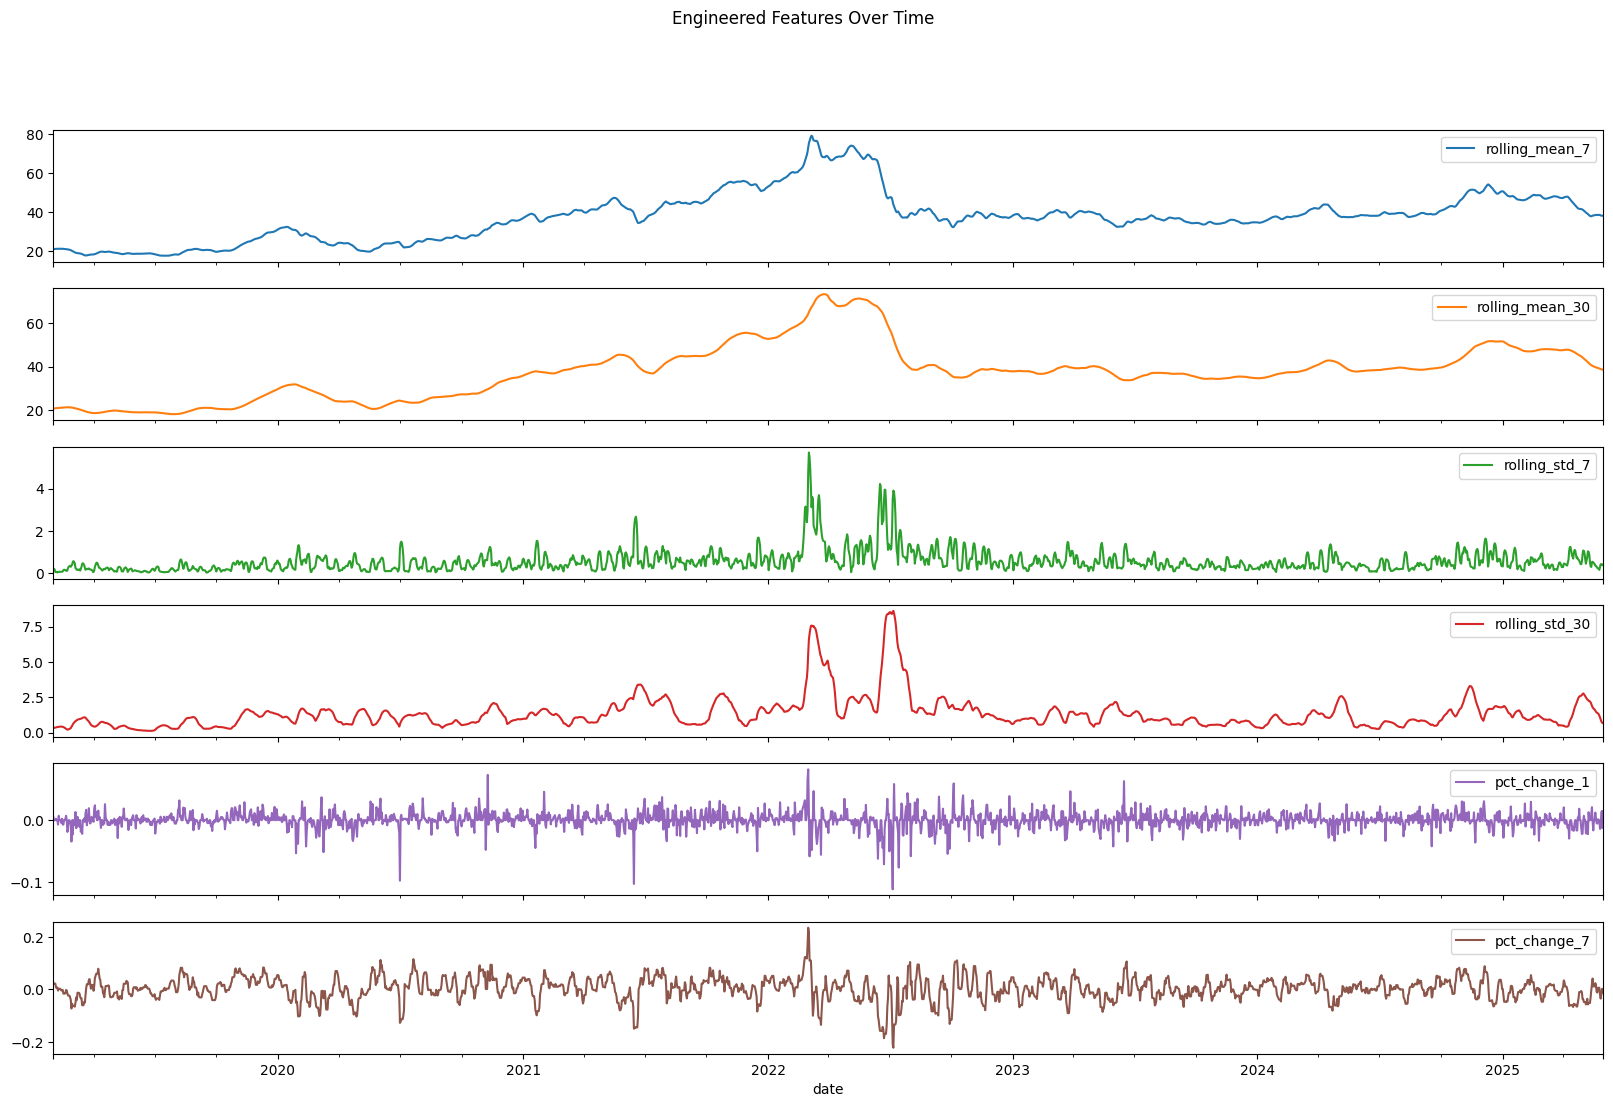

In [31]:
df[["rolling_mean_7","rolling_mean_30","rolling_std_7","rolling_std_30","pct_change_1","pct_change_7"]].plot(figsize=(20,12), subplots=True, title="Engineered Features Over Time")
plt.show()

In [32]:
df.to_parquet("cleaned_data_2.parquet", index=False)